## **Dataset: Adult - UCI Machine Learning Repository**

Link: https://archive.ics.uci.edu/dataset/2/adult

### **4. Preparar os dados para os modelos de ML:**

In [129]:
import pandas as pd

In [130]:
dataset = pd.read_csv("data/adult.csv")
dataset

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### **4.1 - Tratamento no nome das colunas:**

In [203]:
dataset.columns = ["age", "workclass", "fnlwgt", "education","education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
dataset


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### **4.2 - Tratando Valores Incoerentes:**

##### **4.2.1 - workclass:**

In [132]:
dataset["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1115
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

**1836** registros com o atributo "?".

In [200]:
dataset.loc[dataset["workclass"] == ' ?'] = " Private"

In [134]:
dataset["workclass"].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1115
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

##### **4.2.2 - occupation:**

In [135]:
dataset["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4065
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

**1843** registros com o atributo "?".

In [199]:
dataset.loc[dataset["occupation"] == ' ?'] = " Prof-specialty"

In [137]:
dataset["occupation"].value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4065
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

##### **4.3.3 - native-country:**

In [138]:
dataset["native-country"].value_counts()

native-country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

**583** registros com o atributo "?".

In [198]:
dataset.loc[dataset["native-country"] == ' ?'] = " United-States"

In [140]:
dataset["native-country"].value_counts()

native-country
United-States                 29752
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

#### **4.3 - Tratando Outliers:**

##### **4.3.1 fnlwgt:**

In [201]:
def InterQuartileRange(dataset, colname):

    description = dataset[colname].describe()
    
    Q1 = description["25%"]
    Q3 = description["75%"]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Valor Limite.
    upper_bound = Q3 + 1.5 * IQR  # Valor Máximo.

    return lower_bound, upper_bound

lower_bound, upper_bound = InterQuartileRange(dataset, 'fnlwgt')

outliers_fnlwgt = dataset.loc[(dataset['fnlwgt'] < lower_bound) | (dataset['fnlwgt'] > upper_bound)]
outliers_fnlwgt

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
89,43,Federal-gov,410867,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
200,26,Private,397317,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,1876,40,United-States,<=50K
251,42,Private,390781,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,<=50K
317,22,Private,399087,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Other-relative,White,Female,0,0,40,Mexico,<=50K
364,22,Private,410439,HS-grad,9,Married-spouse-absent,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32250,43,Private,409922,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,50,United-States,>50K
32375,59,Private,395736,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,>50K
32442,25,Private,390657,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,<=50K
32494,82,Private,403910,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,3,United-States,<=50K


In [145]:
display(lower_bound, upper_bound)

np.float64(-61008.0)

np.float64(415878.0)

In [146]:
dataset["fnlwgt"].median()

np.float64(178356.0)

In [202]:
dataset.loc[dataset["fnlwgt"].isin(outliers_fnlwgt["fnlwgt"]), "fnlwgt"] = dataset["fnlwgt"].median()

In [148]:
dataset.loc[(dataset['fnlwgt'] < lower_bound) | (dataset['fnlwgt'] > upper_bound)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


#### **4.4 - Pré-processamento dos Dados:**

##### **4.4.1 Separando os Dados:**

In [149]:
x_features = dataset.iloc[:, 0:14].values
y_class = dataset.iloc[:, 14].values

display(x_features, y_class)

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [40, ' Private', 154374, ..., 0, 40, ' United-States'],
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States']],
      shape=(32560, 14), dtype=object)

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      shape=(32560,), dtype=object)

##### **4.4.2 - Codificando a Base de Dados:**

In [159]:
# Ferramentas para Pré-Processamento

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [160]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [162]:
codificador_label = LabelEncoder()

for i in range(x_features.shape[1]):
    x_features[:,i] = codificador_label.fit_transform(x_features[:, i])
    

In [163]:
y_class = codificador_label.fit_transform(y_class)


In [164]:
display(x_features, y_class)

array([[22, 6, 2671, ..., 0, 39, 38],
       [33, 5, 2926, ..., 0, 12, 38],
       [21, 3, 14086, ..., 0, 39, 38],
       ...,
       [23, 3, 8080, ..., 0, 39, 38],
       [41, 3, 7883, ..., 0, 39, 38],
       [5, 3, 12881, ..., 0, 19, 38]], shape=(32560, 14), dtype=object)

array([0, 0, 0, ..., 1, 0, 0], shape=(32560,))

- <=50K - 0 
- \>50K - 1

##### **4.4.3 - Padronização dos Valores Codificados:**

In [165]:
padronizador = StandardScaler()
x_features = padronizador.fit_transform(x_features)
x_features

array([[ 0.03080871,  2.62430941, -1.3054282 , ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 0.83753836,  1.72111602, -1.26102289, ..., -0.20417998,
        -2.25444135,  0.26137428],
       [-0.04253035, -0.08527078,  0.68236238, ..., -0.20417998,
        -0.03112222,  0.26137428],
       ...,
       [ 0.10414777, -0.08527078, -0.36351324, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [ 1.42425084, -0.08527078, -0.39781852, ..., -0.20417998,
        -0.03112222,  0.26137428],
       [-1.2159553 , -0.08527078,  0.47252553, ..., -0.20417998,
        -1.67802528,  0.26137428]], shape=(32560, 14))

In [166]:
x_features.shape, y_class.shape

((32560, 14), (32560,))

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_class, test_size=0.15)

In [168]:
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(27676, 14)

(4884, 14)

(27676,)

(4884,)

### **5- Encontrando os melhores parâmetros com GridSearch:**

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

#### **5.1 - Regressão Logística:**

In [88]:
param_grid = {'C': [1.0, 1.5, 2.0],
              'solver':['lbfgs', 'sag', 'saga'],
              'tol':[0.0001, 0.00001, 0.000001]
              }

grid_search =  GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)


{'C': 2.0, 'solver': 'saga', 'tol': 0.0001}

np.float64(0.7877831715210356)

#### **5.2 - SVC:**

In [89]:
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'C':[1.0, 1.5, 2.0],
              'tol':[0.0001, 0.00001, 0.000001]
              }

grid_search =  GridSearchCV(estimator=SVC(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.0001}

np.float64(0.8612459546925566)

#### **5.3 - Random Forest:**

In [90]:
param_grid = {'n_estimators': [10, 40, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]
              }

grid_search =  GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

np.float64(0.8895428802588997)

#### **5.4 - Gradient Boosting:**

In [44]:

param_grid = {'n_estimators': [10, 40, 100],
              'max_depth': [10, 20, 30],
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [2, 5, 10],
              }


grid_search =  GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 10,
 'n_estimators': 100}

np.float64(0.8946601941747574)

#### **5.5 - Redes Neurais**

In [45]:
param_grid = {'activation':['relu', 'logistic', 'tahn'],
              'solver':['adam', 'sgd'],
              'batch_size': [10, 56]
              }

grid_search =  GridSearchCV(estimator=MLPClassifier(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

c:\2- Udemy\machine_learning\aperfeiçoando\treino010\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\2- Udemy\machine_learning\aperfeiçoando\treino010\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\2- Udemy\machine_learning\aperfeiçoando\treino010\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\2- Udemy\machine_learning\aperfeiçoando\treino010\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached 

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}

np.float64(0.8696601941747574)

#### **5.6 - Balanced Random Forest:**

In [46]:
param_grid = {'n_estimators': [10, 40, 100, 150],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]
              }

grid_search =  GridSearchCV(estimator=BalancedRandomForestClassifier(), param_grid=param_grid)
grid_search.fit(x_features, y_class)

melhores_parametros = grid_search.best_params_
melhores_resultados = grid_search.best_score_

display(melhores_parametros)
display(melhores_resultados)

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

np.float64(0.8902710355987056)

### **6- Explorar vários modelos:**

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn
import pickle as pkl


In [102]:
def PerformanceMetrics(y_true, predict, class_name):
    # Imprime Matriz de Confusão:

    confusion_matrix_df = pd.DataFrame(
        confusion_matrix(y_true, predict), 
        index=class_name, 
        columns=class_name
    )

    plt.figure(figsize=(5,3))
    sn.set_theme(font_scale=0.9, )
    sn.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues", cbar=False)

    # Imprime a Acurácia:

    print(f"A acurácia geral do modelo em relação a todos os dados foi de aproximadamente {accuracy_score(y_true, predict) * 100:.2f}%.")
    for i, label in enumerate(class_name):
        print(f"O modelo identificou corretamente {confusion_matrix_df.values[i][i]} registros com o rótulo '{label}'.")

    fpr, tpr, thresholds = roc_curve(y_true, predict)
    auc = roc_auc_score(y_true, predict)
    plt.figure(figsize=(5,3))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linha diagonal (classificador aleatório)
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
    plt.title('Curva ROC', fontsize=14)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

Na documentação da base de dados, foi indicado usar os seguintes tipos de modelos:

  - Gradient Boosting Classifier 
  - Support Vector Machines 
  - Random Forest Classifier 
  - Neural Network Classification
  - Logistic Regression 

No entanto, como analisado anteriormente, no atributo "Income" há um desbalanceamento de classes aonde pode ocasionar em uma generalização excessiva para rendas menores ou iguais a U$50K. Com isto, decidi utilizar um algoritmo da biblioteca imblearn chamado:

   - Balanced Random Forest Classifier 

Porque utiliza-lo?
- o Balanced Random Forest ele possui o mesmo funcionamento que o Random Forest tradicional, porém ele realiza uma subamostragem da classe majoritária para que cada árvore obtenha um conjunto de dados equilibrado entre as classes majoritária e minoritária. Ou seja, esse algoritmo combina técnicas de **undersampling** com o algoritmo **Random Forest** para as previsões.

##### **6.1 - Regressão Logítica:**

In [169]:
x_train.shape, y_train.shape

((27676, 14), (27676,))

In [170]:
modelo_logistica = LogisticRegression(C=2.0, solver='saga', tol=0.0001, random_state=42)
modelo_logistica.fit(x_train, y_train)
previsao_log = modelo_logistica.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 82.06%.
O modelo identificou corretamente 3473 registros com o rótulo '<=50K'.
O modelo identificou corretamente 535 registros com o rótulo '>50'.


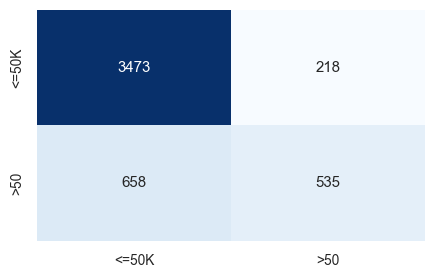

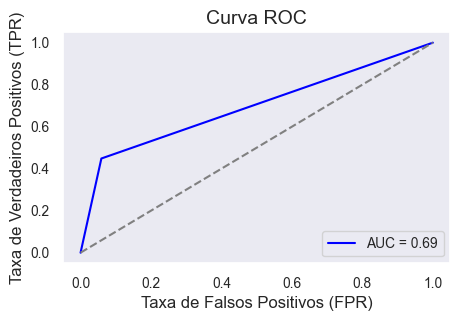

In [171]:
PerformanceMetrics(y_test, previsao_log, ["<=50K", ">50"])

In [172]:
print(classification_report(y_test, previsao_log))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3691
           1       0.71      0.45      0.55      1193

    accuracy                           0.82      4884
   macro avg       0.78      0.69      0.72      4884
weighted avg       0.81      0.82      0.81      4884



In [173]:
with open("model_log.pkl","wb") as f:
    pkl.dump(modelo_logistica, f)

##### **6.2 - Support Vector Machines:**

In [174]:
modelo_svm = SVC(C=2.0, kernel='rbf', tol=0.0001,  random_state=42)
modelo_svm.fit(x_train, y_train)
previsao_svm = modelo_svm.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 84.64%.
O modelo identificou corretamente 3480 registros com o rótulo '<=50K'.
O modelo identificou corretamente 654 registros com o rótulo '>50'.


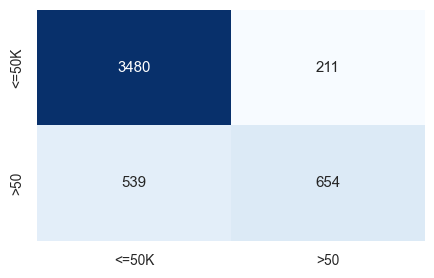

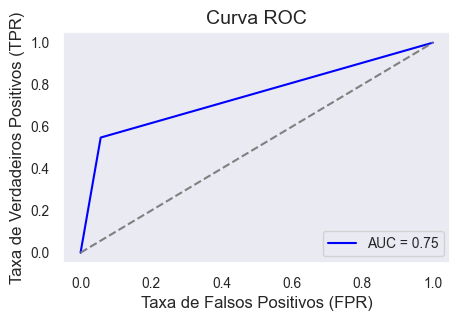

In [175]:
PerformanceMetrics(y_test, previsao_svm, ["<=50K", ">50"])

In [176]:
print(classification_report(y_test, previsao_svm))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3691
           1       0.76      0.55      0.64      1193

    accuracy                           0.85      4884
   macro avg       0.81      0.75      0.77      4884
weighted avg       0.84      0.85      0.84      4884



In [177]:
with open("model_svm.pkl","wb") as f:
    pkl.dump(modelo_svm, f)

##### **6.3 - Random Forest Classifier:**

In [179]:
modelo_random = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=42)
modelo_random.fit(x_train, y_train)
previsao_random = modelo_random.predict(x_test)


A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 85.95%.
O modelo identificou corretamente 3443 registros com o rótulo '<=50K'.
O modelo identificou corretamente 755 registros com o rótulo '>50'.


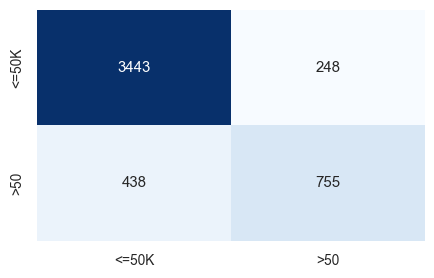

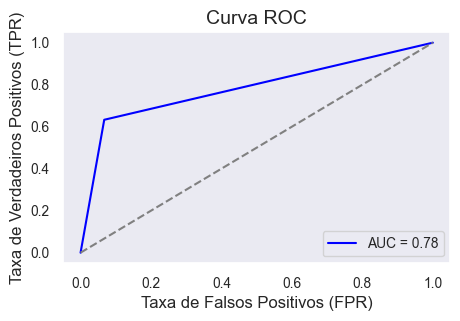

In [180]:
PerformanceMetrics(y_test, previsao_random, ["<=50K", ">50"])

In [181]:
print(classification_report(y_test, previsao_random))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3691
           1       0.75      0.63      0.69      1193

    accuracy                           0.86      4884
   macro avg       0.82      0.78      0.80      4884
weighted avg       0.85      0.86      0.86      4884



In [182]:
with open("model_random.pkl","wb") as f:
    pkl.dump(modelo_random, f)

##### **6.4 - Gradient Boosting Classifier:**

In [183]:
modelo_gradient = GradientBoostingClassifier(n_estimators=100, min_samples_split=10, max_features='log2', max_depth=10)
modelo_gradient.fit(x_train, y_train)
previsao_gradient = modelo_gradient.predict(x_test)


A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 86.98%.
O modelo identificou corretamente 3457 registros com o rótulo '<=50K'.
O modelo identificou corretamente 791 registros com o rótulo '>50'.


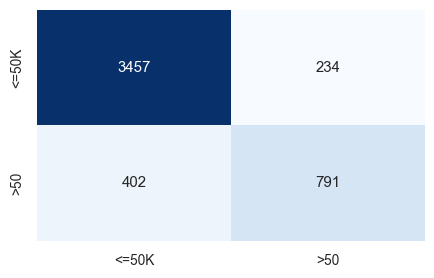

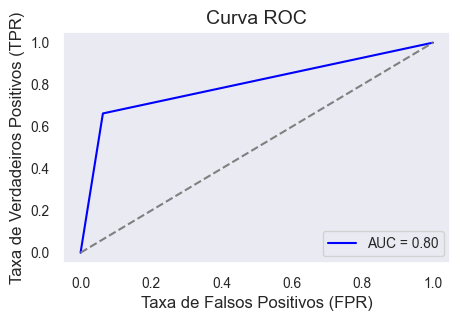

In [184]:
PerformanceMetrics(y_test, previsao_gradient, ["<=50K", ">50"])

In [185]:
print(classification_report(y_test, previsao_gradient))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3691
           1       0.77      0.66      0.71      1193

    accuracy                           0.87      4884
   macro avg       0.83      0.80      0.81      4884
weighted avg       0.87      0.87      0.87      4884



In [186]:
with open("model_gradient.pkl","wb") as f:
    pkl.dump(modelo_gradient, f)

##### **6.5 - Neural Network Classification:**

In [187]:
modelo_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
modelo_neural.fit(x_train, y_train)
previsao_neural = modelo_neural.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 84.34%.
O modelo identificou corretamente 3380 registros com o rótulo '<=50K'.
O modelo identificou corretamente 739 registros com o rótulo '>50'.


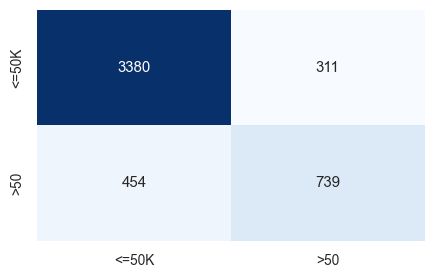

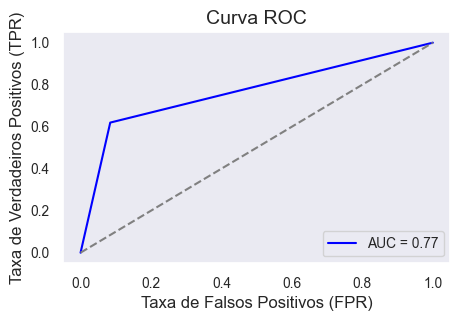

In [188]:
PerformanceMetrics(y_test, previsao_neural, ["<=50K", ">50"])

In [189]:
print(classification_report(y_test, previsao_neural))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3691
           1       0.70      0.62      0.66      1193

    accuracy                           0.84      4884
   macro avg       0.79      0.77      0.78      4884
weighted avg       0.84      0.84      0.84      4884



In [190]:
with open("model_neural.pkl","wb") as f:
    pkl.dump(modelo_neural, f)

##### **6.6 - Balanced Random Forest Classifier:**

In [191]:
from imblearn.ensemble import BalancedRandomForestClassifier


In [193]:
modelo_random_bal = BalancedRandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=0)
modelo_random_bal.fit(x_train, y_train)
previsao_random = modelo_random_bal.predict(x_test)

A acurácia geral do modelo em relação a todos os dados foi de aproximadamente 83.09%.
O modelo identificou corretamente 3078 registros com o rótulo '<=50K'.
O modelo identificou corretamente 980 registros com o rótulo '>50'.


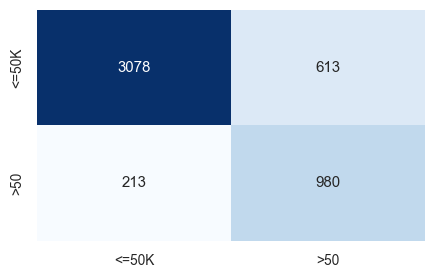

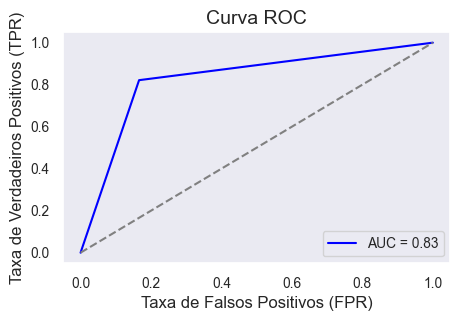

In [194]:
PerformanceMetrics(y_test, previsao_random, ["<=50K", ">50"])

In [195]:
print(classification_report(y_test, previsao_random))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3691
           1       0.62      0.82      0.70      1193

    accuracy                           0.83      4884
   macro avg       0.78      0.83      0.79      4884
weighted avg       0.86      0.83      0.84      4884



In [196]:
with open("model_balanced_rf.pkl","wb") as f:
    pkl.dump(modelo_random_bal, f)

### Resultado do Treinamento:

- Entre os 6 modelos utilizados para a classificação de registros, aqueles que mostraram os melhores resultados foi o algoritmo **Balanced Random Forest** com **83% de acurácia** e o **Gradient Boosting Classifier** com **87% de acurácia**. 

- Esses algoritmos estão sendo levados em consideração, pois cada um deles será útil para cenários diferentes. Enquanto o Balanced Random Forest será benéfico quando se deseja identificar registros com classes minoritárias que neste caso são rendas superiores a U$50K, o Gradient Boosting Classifier será benéfico quando se deseja um desempenho geral sobre os registros.

- No entanto, como o objetivo desse projeto é identificar corretamente os registros em suas respectivas classes, vamos assumir o cenário de que o **Balanced Random Forest** foi o algoritmo que obteve o melhor desempenho para o projeto, uma vez que ele consegue identificar as classes minoritárias e maioritárias de maneira equilibrada, com um bom recall para a classe minoritária e precisão para a classe majoritária.

### **7- Apresentando Solução:**

<a href="3test.ipynb">Direcionando para o Arquivo de apresentação da solução</a>